In [ ]:
!pip install psycopg2-binary > None

In [ ]:
!pip install dash > None

In [ ]:
import dash
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objs as go
import psycopg2
import seaborn as sns
from dash import dcc, html
from dash.dependencies import Input, Output

In [ ]:
conn = psycopg2.connect(
    host="158.160.52.106",
    port=5432,
    database="postgres",
    user="student",
    password="JvLda93aA",
)
cur = conn.cursor()

cur.execute("SELECT * FROM msu_analytics.game")


data = cur.fetchall()
data[:5]

OperationalError: ignored

In [ ]:
game = pd.read_sql("SELECT * FROM msu_analytics.game", conn)
app = pd.read_sql("SELECT * FROM msu_analytics.application", conn)
acc = pd.read_sql("SELECT * FROM msu_analytics.account", conn)
cli = pd.read_sql("SELECT * FROM msu_analytics.client", conn)

/usr/local/lib/python3.9/dist-packages/pandas/io/sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/pandas/io/sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/pandas/io/sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/pandas/io/sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 conne

In [ ]:
game.head()

,game_rk,quest_rk,employee_rk,game_dttm,price,game_flg,finish_flg,time
0,9,24,4,2022-12-07 03:35:01.504956,1801.54,1,1,16:50:33
1,41,14,10,2023-01-24 00:50:38.029468,1996.72,1,1,04:35:40
2,57,29,8,2022-12-30 01:27:43.771770,2742.21,1,0,04:00:22
3,73,14,10,2022-11-26 12:23:44.323394,1935.05,1,0,06:49:44
4,105,24,16,2023-01-21 19:20:42.404956,1158.44,1,0,20:50:49


In [ ]:
game.groupby(pd.Grouper(key='game_dttm', freq='M')).count().reset_index()

,game_dttm,game_rk,quest_rk,employee_rk,price,game_flg,finish_flg,time
0,2022-09-30,3,3,3,3,3,3,3
1,2022-10-31,22,22,22,22,22,22,22
2,2022-11-30,47,47,47,47,47,47,47
3,2022-12-31,56,56,56,56,56,56,56
4,2023-01-31,74,74,74,74,74,74,74
5,2023-02-28,136,136,136,136,136,136,136
6,2023-03-31,114,114,114,114,114,114,114
7,2023-04-30,4,4,4,4,4,4,4


<Axes: xlabel='game_dttm', ylabel='game_rk'>

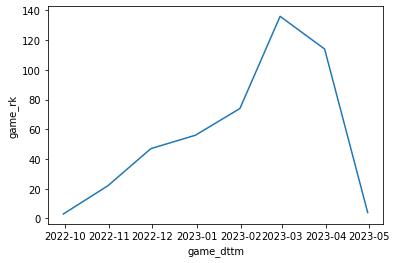

In [ ]:
sns.lineplot(x="game_dttm", y="game_rk",
             data=game.groupby(pd.Grouper(key='game_dttm', freq='M')).count().reset_index())

<Axes: xlabel='game_dttm', ylabel='game_rk'>

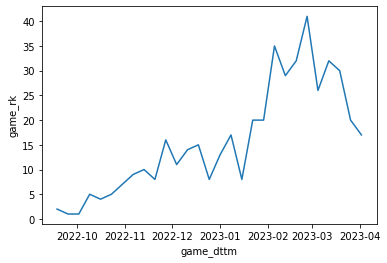

In [ ]:
sns.lineplot(x="game_dttm", y="game_rk",
             data=game.groupby(pd.Grouper(key='game_dttm', freq='W')).count().reset_index())

In [ ]:
game.game_dttm.max()

Timestamp('2023-04-02 21:03:44.576372')

In [ ]:
cli.head()

,client_rk,first_name,last_name,phone_num,visit_dttm
0,28,Родион,Ильин,+79685707345,2022-11-28 07:57:58.338674
1,108,Раиса,Никифорова,+79664187124,2023-01-04 05:31:33.158886
2,124,Август,Беспалов,+79683901802,2022-11-03 23:51:40.644591
3,204,Клим,Лыткин,+79633966259,2023-01-06 06:10:40.488902
4,220,Валентина,Дементьева,+79537555870,2022-09-09 21:54:34.067697


In [ ]:
cli.visit_dttm.min()

Timestamp('2022-09-01 03:32:43.977277')

In [ ]:
cli.visit_dttm.max()

Timestamp('2023-02-02 02:22:04.176738')

In [ ]:
(cli.visit_dttm.max() - cli.visit_dttm.min()) / np.timedelta64 ( 1 , 'D') # разница в днях между начальной датой и конечной

153.95092823450233

In [ ]:
cli.shape

(4096, 5)

In [ ]:
cli.client_rk.nunique() 

4096

Все записи в таблицы с клиентами являются уникальными - каждый клиент учитывается ровно один раз (т к кол-во строк равно количеству уникальных значений идентификатора клиента). 

<Axes: xlabel='visit_dttm', ylabel='client_rk'>

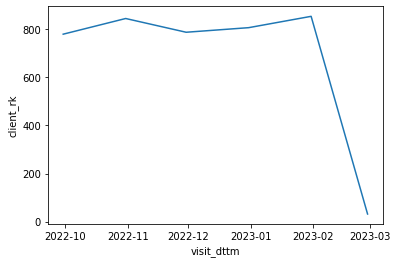

In [ ]:
sns.lineplot(x="visit_dttm", y="client_rk",
             data=cli.groupby(pd.Grouper(key='visit_dttm', freq='M')).count().reset_index())

<Axes: xlabel='visit_dttm', ylabel='client_rk'>

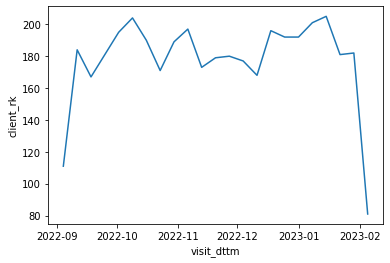

In [ ]:
sns.lineplot(x="visit_dttm", y="client_rk",
             data=cli.groupby(pd.Grouper(key='visit_dttm', freq='W')).count().reset_index())

In [ ]:
app.head()

,application_rk,account_rk,game_rk,application_dttm
0,185,575,320,2023-01-24 13:24:08.401384
1,153,748,36,2022-12-20 19:55:09.096945
2,249,525,158,2022-12-24 07:46:14.545710
3,73,589,23,2022-12-02 11:29:58.702388
4,446,749,210,2023-01-22 18:15:39.020132


<Axes: xlabel='application_dttm', ylabel='application_rk'>

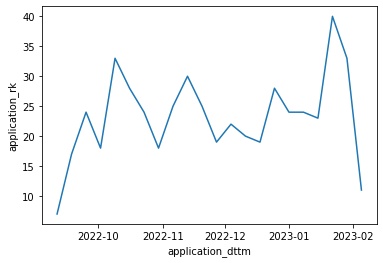

In [ ]:
sns.lineplot(x="application_dttm", y="application_rk",
             data=app.groupby(pd.Grouper(key='application_dttm', freq='W')).count().reset_index())

<Axes: xlabel='application_dttm', ylabel='application_rk'>

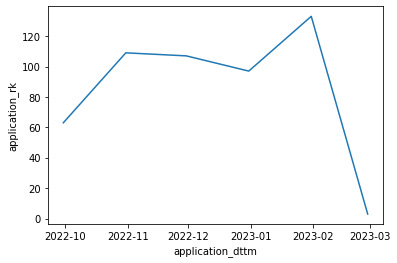

In [ ]:
sns.lineplot(x="application_dttm", y="application_rk",
             data=app.groupby(pd.Grouper(key='application_dttm', freq='M')).count().reset_index())

In [ ]:
game.game_rk.nunique() == game.game_rk.shape[0] # все ключи игр уникальные

True

Так как в одной игре может учавствовать несколько игроков, то необходиомо расширить датасет game

In [ ]:
game_modify = app[['account_rk','game_rk']].merge(game, how = 'outer')

Создание датасета для слияния всех данных 

In [ ]:
data_2_merge = pd.DataFrame({'date': pd.date_range (start='2022-09-01', periods= 154 , freq='D')})

Далее необходимо произвести merge для таблиц, содержащих информацию о посещении сайта клиентом, о его регистрации и о записи на игру. Предварительно все таблицы (game, acc, app, cli) сгруппируем по дням и агрегируем по функции count.

In [ ]:
cli = cli.groupby(pd.Grouper(key='visit_dttm', freq='D'))\
    .agg({'client_rk': 'count'}).reset_index().rename(columns = {'visit_dttm': 'date'})
acc = acc.groupby(pd.Grouper(key='registration_dttm', freq='D'))\
    .agg({'account_rk': 'count'}).reset_index().rename(columns = {'registration_dttm': 'date'})
app = app.groupby(pd.Grouper(key='application_dttm', freq='D'))\
    .agg({'application_rk': 'count'}).reset_index().rename(columns = {'application_dttm': 'date'})
game_modify = game_modify.groupby(pd.Grouper(key='game_dttm', freq='D'))\
    .agg({'game_flg': 'sum','finish_flg': 'sum' ,'game_rk': 'count'}).reset_index().rename(columns = {'game_dttm': 'date'})

In [ ]:
game_modify.head()

,date,game_flg,finish_flg,game_rk
0,2022-09-16,1,1,2
1,2022-09-17,0,0,0
2,2022-09-18,0,0,0
3,2022-09-19,0,0,0
4,2022-09-20,0,0,0


<Axes: xlabel='date', ylabel='game_rk'>

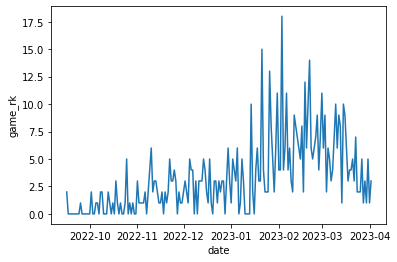

In [ ]:
sns.lineplot(x="date", y="game_rk",
             data=game_modify)

In [ ]:
cli.shape

(155, 2)

In [ ]:
all_data = data_2_merge.merge(cli, on = 'date', how = 'outer').merge(acc, on = 'date', how = 'outer')\
    .merge(app, on = 'date', how = 'outer').merge(game_modify, on = 'date', how = 'outer')

In [ ]:
all_data = all_data.fillna(0)

In [ ]:
#@markdown - Воронка с группировкой по месяцам
freq = 'M' 
choose_data = '2022-11-30 00:00:00' #@param ['2022-09-30 00:00:00','2022-10-31 00:00:00','2022-11-30 00:00:00','2022-12-31 00:00:00','2023-01-31 00:00:00','2023-02-28 00:00:00','2023-03-31 00:00:00','2023-04-30 00:00:00']

def drop_agg(freq, all_data, choose_data):
  all_data_temp = all_data.groupby(pd.Grouper(key='date', freq=freq)).sum().reset_index()
  data_temp = all_data.groupby(pd.Grouper(key='date', freq=freq)).sum()
  filtered_df = data_temp.loc[[choose_data]]
  cols = ['client_rk', 'account_rk', 'application_rk', 'game_rk' ,'game_flg']
  filtered_df = filtered_df[cols]

  return cols, filtered_df.values.reshape(5,).tolist()

stage, count = drop_agg(freq, all_data, choose_data)

fig = go.Figure(go.Funnel(
    y = stage,
    x = count,  
    textposition = "inside",
    textinfo = "value+percent initial",
    opacity = 0.65, marker = {"color": ["deepskyblue", "lightsalmon", "tan", "teal", "silver"],
    "line": {"width": [4, 2, 2, 3, 1, 1], "color": ["wheat", "wheat", "blue", "wheat", "wheat"]}},
    connector = {"line": {"color": "royalblue", "dash": "dot", "width": 3}})
    )

fig.show()


In [ ]:
#@markdown - Воронка с группировкой по неделям
freq = 'W' 
choose_data = '2022-11-06 00:00:00'#@param['2022-09-04 00:00:00','2022-09-11 00:00:00','2022-09-18 00:00:00','2022-09-25 00:00:00','2022-10-02 00:00:00','2022-10-09 00:00:00','2022-10-16 00:00:00','2022-10-23 00:00:00','2022-10-30 00:00:00','2022-11-06 00:00:00','2022-11-13 00:00:00','2022-11-20 00:00:00','2022-11-27 00:00:00','2022-12-04 00:00:00','2022-12-11 00:00:00','2022-12-18 00:00:00','2022-12-25 00:00:00','2023-01-01 00:00:00','2023-01-08 00:00:00','2023-01-15 00:00:00','2023-01-22 00:00:00','2023-01-29 00:00:00','2023-02-05 00:00:00','2023-02-12 00:00:00','2023-02-19 00:00:00','2023-02-26 00:00:00','2023-03-05 00:00:00','2023-03-12 00:00:00','2023-03-19 00:00:00','2023-03-26 00:00:00','2023-04-02 00:00:00']

stage, count = drop_agg(freq, all_data, choose_data)

fig = go.Figure(go.Funnel(
    y = stage,
    x = count,  
    textposition = "inside",
    textinfo = "value+percent initial",
    opacity = 0.65, marker = {"color": ["deepskyblue", "lightsalmon", "tan", "teal", "silver"],
    "line": {"width": [4, 2, 2, 3, 1, 1], "color": ["wheat", "wheat", "blue", "wheat", "wheat"]}},
    connector = {"line": {"color": "royalblue", "dash": "dot", "width": 3}})
    )

fig.show()

In [ ]:
 #all_data.groupby(pd.Grouper(key='date', freq='W')).sum().reset_index().date.apply(lambda x: str(x)).tolist()

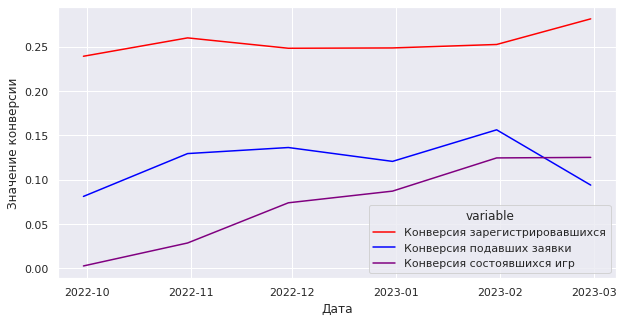

In [ ]:
#@markdown - Line plot для конверсии по меcяцам (конверсия от начального числа клиентов)
all_data_mon = all_data.groupby(pd.Grouper(key='date', freq='M')).sum().reset_index()

all_data_mon['Конверсия зарегистрировавшихся'] = all_data_mon['account_rk'] / all_data_mon['client_rk']
all_data_mon['Конверсия подавших заявки'] = all_data_mon['application_rk'] / all_data_mon['client_rk']
all_data_mon['Конверсия состоявшихся игр'] = all_data_mon['game_flg'] / all_data_mon['client_rk']
df_temp = all_data_mon[['date', 'Конверсия зарегистрировавшихся','Конверсия подавших заявки', 'Конверсия состоявшихся игр']]

sns.set(rc={"figure.figsize":(10, 5)});
ax = sns.lineplot(x='date', y='value', hue='variable', 
             data=pd.melt(df_temp, ['date']),
             palette=['red', 'blue', 'purple'])

ax.set(xlabel='Дата', ylabel='Значение конверсии');

fig = px.line(pd.melt(df_temp, ['date']), x='date', y='value', color='variable',
                 labels={
                     "date": "Дата",
                     "value": "Процент, %",
                     "variable": "Значение оттенков на графике"
                 },
                title="Конверсия по месяцам")

fig.update_layout(xaxis_range=[df_temp.date.min(),'2023-02-28 00:00:00'])

fig.show()


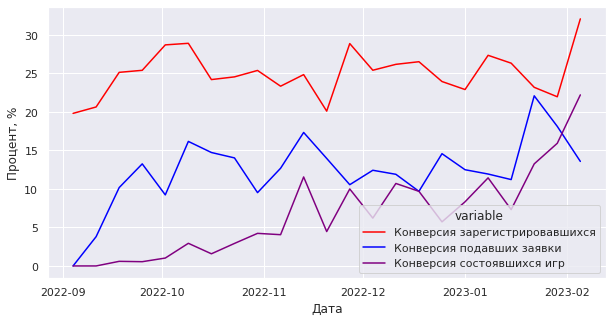

In [ ]:
#@markdown - Line plot для конверсии по неделям (конверсия от начального числа клиентов)
all_data_mon = all_data.groupby(pd.Grouper(key='date', freq='W')).sum().reset_index()

all_data_mon['Конверсия зарегистрировавшихся'] = all_data_mon['account_rk'] / all_data_mon['client_rk'] * 100
all_data_mon['Конверсия подавших заявки'] = all_data_mon['application_rk'] / all_data_mon['client_rk'] * 100
all_data_mon['Конверсия состоявшихся игр'] = all_data_mon['game_flg'] / all_data_mon['client_rk'] * 100
df_temp = all_data_mon[['date', 'Конверсия зарегистрировавшихся','Конверсия подавших заявки', 'Конверсия состоявшихся игр']]

sns.set(rc={"figure.figsize":(10, 5)});
ax = sns.lineplot(x='date', y='value', hue='variable', 
             data=pd.melt(df_temp, ['date']),
             palette=['red', 'blue', 'purple'])

ax.set(xlabel='Дата', ylabel='Процент, %');

fig = px.line(pd.melt(df_temp, ['date']), x='date', y='value', color='variable',
                 labels={
                     "date": "Дата",
                     "value": "Процент, %",
                     "variable": "Значение оттенков на графике"
                 },
                title="Конверсия по неделям")

fig.update_layout(xaxis_range=[df_temp.date.min(),'2023-02-05 00:00:00'])

fig.show()


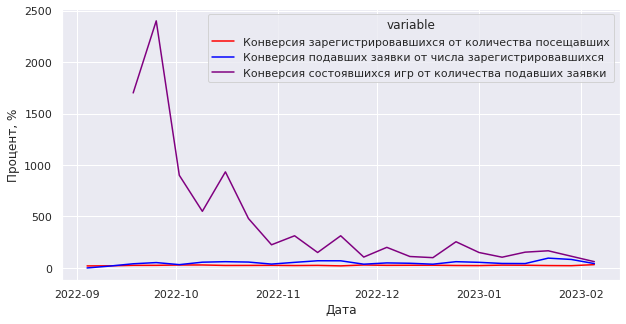

In [ ]:
#@markdown - Line plot для конверсии по неделям (конверсия от числа клиентов на предыдущем шаге)
all_data_mon = all_data.groupby(pd.Grouper(key='date', freq='W')).sum().reset_index()

all_data_mon['Конверсия зарегистрировавшихся от количества посещавших'] = all_data_mon['account_rk'] / all_data_mon['client_rk'] * 100
all_data_mon['Конверсия подавших заявки от числа зарегистрировавшихся'] = all_data_mon['application_rk'] / all_data_mon['account_rk'] * 100
all_data_mon['Конверсия состоявшихся игр от количества подавших заявки'] = all_data_mon['application_rk'] / all_data_mon['game_flg'] * 100

df_temp = all_data_mon[['date', 'Конверсия зарегистрировавшихся от количества посещавших',
       'Конверсия подавших заявки от числа зарегистрировавшихся',
       'Конверсия состоявшихся игр от количества подавших заявки']]

sns.set(rc={"figure.figsize":(10, 5)});
ax = sns.lineplot(x='date', y='value', hue='variable', 
             data=pd.melt(df_temp, ['date']),
             palette=['red', 'blue', 'purple'])

ax.set(xlabel='Дата', ylabel='Процент, %');

fig = px.line(pd.melt(df_temp, ['date']), x='date', y='value', color='variable',
                 labels={
                     "date": "Дата",
                     "value": "Процент, %",
                     "variable": "Значение оттенков на графике"
                 },
                title="Конверсия по неделям")

fig.update_layout(xaxis_range=[df_temp.date.min(),'2023-02-05 00:00:00'])

fig.show()


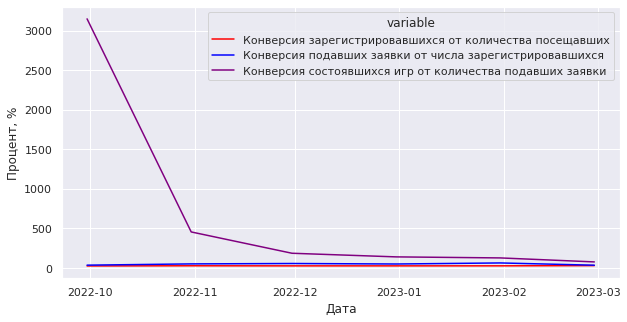

In [ ]:
#@markdown - Line plot для конверсии по месяцам (конверсия от числа клиентов на предыдущем шаге)
all_data_mon = all_data.groupby(pd.Grouper(key='date', freq='M')).sum().reset_index()

all_data_mon['Конверсия зарегистрировавшихся от количества посещавших'] = all_data_mon['account_rk'] / all_data_mon['client_rk'] * 100
all_data_mon['Конверсия подавших заявки от числа зарегистрировавшихся'] = all_data_mon['application_rk'] / all_data_mon['account_rk'] * 100
all_data_mon['Конверсия состоявшихся игр от количества подавших заявки'] = all_data_mon['application_rk'] / all_data_mon['game_flg'] * 100

df_temp = all_data_mon[['date', 'Конверсия зарегистрировавшихся от количества посещавших',
       'Конверсия подавших заявки от числа зарегистрировавшихся',
       'Конверсия состоявшихся игр от количества подавших заявки']]

sns.set(rc={"figure.figsize":(10, 5)});
ax = sns.lineplot(x='date', y='value', hue='variable', 
             data=pd.melt(df_temp, ['date']),
             palette=['red', 'blue', 'purple'])

ax.set(xlabel='Дата', ylabel='Процент, %');

fig = px.line(pd.melt(df_temp, ['date']), x='date', y='value', color='variable',
                 labels={
                     "date": "Дата",
                     "value": "Процент, %",
                     "variable": "Значение оттенков на графике"
                 },
                title="Конверсия по месяцам")

fig.update_layout(xaxis_range=[df_temp.date.min(),'2023-02-28 00:00:00'])

fig.show()


In [ ]:
all_data.groupby(pd.Grouper(key='date', freq='M')).sum().reset_index().to_csv('months.csv', index = False)
all_data.groupby(pd.Grouper(key='date', freq='M')).sum().reset_index().to_csv('weeks.csv', index = False)


In [ ]:
#@markdown - Интерактивные графики с возможностью выбора месяца и недели (при запуске в colab)
choose = '\u041C\u0435\u0441\u044F\u0446' #@param ['Неделя','Месяц']
data = pd.read_csv("/content/months.csv") if choose == 'Месяц' else pd.read_csv("/content/weeks.csv") 
data.sort_values("date", inplace=True)
df = data[['date','client_rk', 'account_rk', 'application_rk', 'game_rk']]

app = dash.Dash(__name__)

app.layout = html.Div([
    dcc.Dropdown(
        id='date-dropdown',
        options=[{'label': date, 'value': date} for date in df['date'].unique()],
        value=df['date'].min()
    ),
    dcc.Graph(id='funnel-chart')
])

@app.callback(
    Output('funnel-chart', 'figure'),
    Input('date-dropdown', 'value')
)
def update_funnel_chart(selected_date):
    filtered_df = df[df['date'] == selected_date]
    transp_df = filtered_df.drop(columns = 'date').T.reset_index()
    stage = transp_df.columns[0]
    count = transp_df.columns[1]
    fig = px.funnel(transp_df, x=transp_df.columns[0], y=transp_df.columns[1])
    return fig

if __name__ == "__main__":
    app.run_server(debug=True,
                   host = '127.0.0.1')

Dash is running on http://127.0.0.1:8050/



INFO:dash.dash:Dash is running on http://127.0.0.1:8050/



 * Serving Flask app '__main__'
 * Debug mode: on


In [ ]:
#@markdown - Интерактивные графики с возможностью выбора месяца и недели (при запуске в jupyter)
choose = '\u041C\u0435\u0441\u044F\u0446' #@param ['Неделя','Месяц']
data = pd.read_csv("months.csv") if choose == 'Месяц' else pd.read_csv("weeks.csv") 
data.sort_values("date", inplace=True)
df = data[['date','client_rk', 'account_rk', 'application_rk', 'game_rk']]

app = dash.Dash(__name__)

app.layout = html.Div([
    dcc.Dropdown(
        id='date-dropdown',
        options=[{'label': date, 'value': date} for date in df['date'].unique()],
        value=df['date'].min()
    ),
    dcc.Graph(id='funnel-chart')
])

@app.callback(
    Output('funnel-chart', 'figure'),
    Input('date-dropdown', 'value')
)
def update_funnel_chart(selected_date):
    filtered_df = df[df['date'] == selected_date]
    transp_df = filtered_df.drop(columns = 'date').T.reset_index()
    stage = transp_df.columns[0]
    count = transp_df.columns[1]
    fig = px.funnel(transp_df, x=transp_df.columns[0], y=transp_df.columns[1])
    return fig

if __name__ == "__main__":
    app.run_server(debug=False,
                   host = '127.0.0.1')

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app '__main__'
 * Debug mode: off
